# "Исследование надёжности заёмщиков" (Курсовая работа, выполненная в ходе обучения в Яндекс Практикуме)

Исходная задача исследования: установить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 
Расширим исходную задачу и установим влияние всех доступных значимых признаков на факт погашения кредита в срок.             
Входные данные от банка — статистика о платёжеспособности 21525 клиентов.
Датасет здесь не приведен, так как он не предназначен для публичного ознакомления. 


Приложенное к датасету описание данных:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита


# План исследования
- [Импорт библиотек, датасета и знакомство с данными.](#a) 
- [Определение характеристик датасета и типов данных. Выявление дубликатов и пропущенных значений. Выделение неверных типов данных.](#b) 
- [Первичный анализ и предобработка данных.](#c)  
    - [Анализ распределения исходных значений признака "Количество детей в семье клиента (children)".](#ca)  
    - [Анализ распределения исходных значений признаков "Уровень образования клиента" и "идентификатор уровня образования" (education, education_id).](#cb) 
    - [Анализ распределения исходных значений признаков "Семейное положение" и "идентификатор семейного положения" (family_status, family_status_id).](#cc) 
    - [Анализ распределения исходных значений признака "Пол клиента (gender)".](#cd) 
    - [Анализ распределения исходных значений признака "Тип занятости клиента (income_type)".](#ce) 
    - [Анализ распределения исходных значений признака "Имел ли клиент задолженность по возврату кредитов (debt)".](#cf) 
    - [Анализ распределения исходных значений признака "Возраст клиента в годах (dob_years)".](#cg) 
    - [Анализ распределения исходных значений признака "Цель получения кредита (purpose)".](#ch) 
    - [Анализ распределения исходных значений признаков "Общий трудовой стаж клиента в днях"  и "ежемесячный доход" (days_employed, total_income).](#ci) 
        - [Ежемесячный доход клиента.](#cia) 
        - [Общий трудовой стаж клиента в днях .](#cib) 
    - [Удаление ненужных столбцов .](#cj) 
- [Исследовательский анализ данных.](#d)
     - [Распределение классов/значений по каждому признаку для всех клиентов и для клиентов с долгом по кредиту.](#da)
        - [Распределение по количеству детей среди всех клиентов и среди должников](#daa)
        - [Распределение  по уровню образования среди всех клиентов и среди должников](#dab)
        - [Распределение  по семейному статусу среди всех клиентов и среди должников](#dac)
        - [Распределение  по полу среди всех клиентов и среди должников](#dad)
        - [Распределение  по типу занятости среди всех клиентов и среди должников](#dae)
        - [Распределение клиентов по цели кредита среди всех клиентов и среди должников](#dai)
        - [Распределение  по возрасту среди всех клиентов и среди должников](#daf)
        - [Распределение по ежемесячному доходу среди всех клиентов и среди должников](#dag)
     -[Проверка мультиколлинеарности признаков и определение важности признаков по влиянию на факт невыплаты кредита .](#db)
- [Выводы.](#e) 

## Импорт библиотек, датасета и знакомство с данными.<a id="a"></a>  

In [1]:
from IPython.display import display 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.ensemble import RandomForestClassifier  
import warnings 

data = pd.read_csv('datasets/data.csv')

In [2]:
display(data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.tail(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [4]:
data.sample(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3041,0,-12785.542677,54,среднее,1,женат / замужем,0,F,компаньон,0,304900.643913,покупка жилья для семьи
2944,0,364444.541281,61,среднее,1,Не женат / не замужем,4,F,пенсионер,0,90281.680469,покупка жилья для семьи
1827,0,-356.522646,47,среднее,1,женат / замужем,0,F,компаньон,0,177734.706698,операции с недвижимостью
10611,0,-193.567522,52,высшее,0,женат / замужем,0,M,сотрудник,0,141083.456258,покупка своего жилья
14128,0,-1468.908802,30,среднее,1,вдовец / вдова,2,F,сотрудник,0,194637.050104,строительство недвижимости


При визуальном знакомстве с сэмплами датасета обнаружено:
- наличие смысловых дубликатов в столбце с указанием уровня образования клиента (education), различающихся регистром написания: Среднее, среднее и СРЕДНЕЕ.
- наличие пропущенных и отрицательных значений в столбце с указанием количества дней трудового стажа (days_employed)
- наличие смысловых дубликатов в столбце с указанием цели кредита: недвижимость, покупка жилой недвижимость, операции с жильем 

Учтем выявленные проблемы на этапе подготовки/очистки датасета

## Определение характеристик датасета и типов данных. Выявление дубликатов и пропущенных значений. Выделение неверных типов данных.<a id="b"></a>  

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
pd.isnull(data).sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
print(data.duplicated().sum())
duplicates_first = data[data.duplicated() ==True]
duplicates_last = data[data.duplicated(keep='last')  ==True]
print(pd.isnull(duplicates_first['days_employed']).sum())
print(pd.isnull(duplicates_last['days_employed']).sum())

54
54
54


In [8]:
display(data[data.duplicated()].head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,покупка жилья для семьи
4182,1,NaN,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,NaN,свадьба
4851,0,NaN,60,среднее,1,гражданский брак,1,F,пенсионер,0,NaN,свадьба
5557,0,NaN,58,среднее,1,гражданский брак,1,F,пенсионер,0,NaN,сыграть свадьбу
7808,0,NaN,57,среднее,1,гражданский брак,1,F,пенсионер,0,NaN,на проведение свадьбы


В датасете 21525 строк и 12 признаков, из которых два имеют дубликаты: education и education_id, family_status и family_status_id.     
Пропущенные значения обнаружены у признаков days_employed и total_income (2174 пропуска - это около 10% от всей выборки). Количество пропусков совпадает, что позволяет предположить, что значения этих признаков пропущены в одних и тех же строках при заполнении данных или при формировании датасета.

Типы данных - соответствующие, тип данных days_employed и total_income лучше изменить на целочисленный, но это возможно только после заполнения или удаления пропущенных значений  

Выявлено 54 строки, имеющих полные дубликаты. Все эти строки имеют пропущенные значения признаков days_employed и total_income. Сразу удалим дубликаты.

In [9]:
data.drop_duplicates(ignore_index =True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21467,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21468,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21469,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


## Первичный анализ и предобработка данных<a id="c"></a>   
Отдельно рассмотрим распределения значений по каждому признаку с целью обнаружения и исправления/удаления аномальных и ошибочных значений и анализа баланса классов значений. 

### Анализ распределения исходных значений признака "Количество детей в семье клиента (children")<a id="ca"></a>   

In [10]:
print('Уникальные категории в children: \n',data['children'].value_counts())

Уникальные категории в children: 
  0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Очевидно, что значения -1 и 20 ошибочны, и так как подобных ошибок много, можно с уверенностью предположить что это ошибка ввода и истинные значения 1 и 2 соответственно. Проведем необходимую замену и посмотрим на получившееся распределение значений

In [11]:
data.loc[data['children'] == -1, 'children'] = 1
data.loc[data['children'] == 20, 'children'] = 2

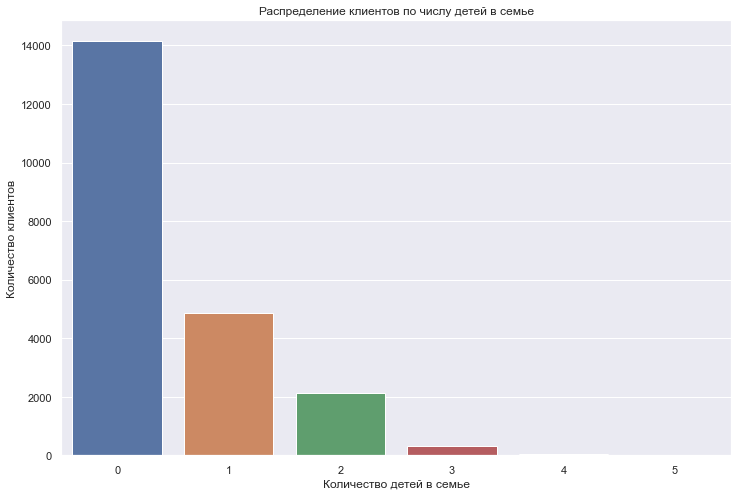

In [12]:

sns.set(rc={"figure.figsize":(12, 8)})
sns.countplot(data['children']).set(title='Распределение клиентов по числу детей в семье',xlabel="Количество детей в семье", ylabel = "Количество клиентов");

Теперь распределение клиентов по числу детей в семье вполне отвечает здравому смыслу и говорит об отсутствии аномалий в данных по этому признаку

### Анализ распределения исходных значений признаков "Уровень образования клиента" и "идентификатор уровня образования" (education, education_id)<a id="cb"></a>   

In [13]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Избавимся от смысловых дубликатов, приведя все значения признака к нижнему регистру

In [14]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

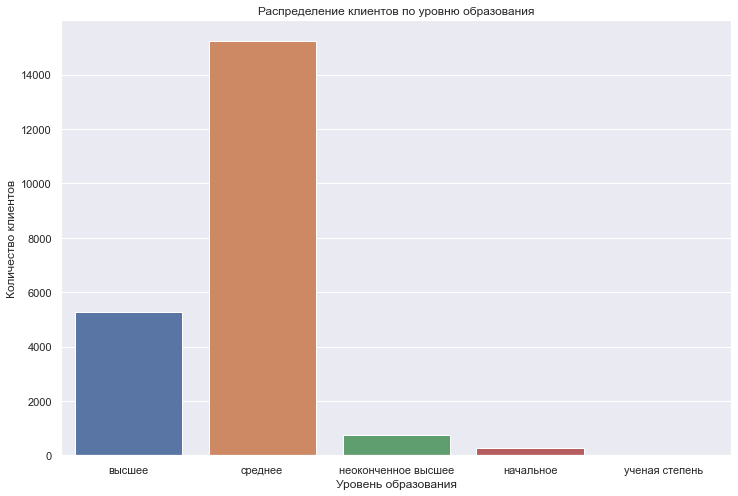

In [15]:
sns.countplot(data['education']).set(title='Распределение клиентов по уровню образования',xlabel="Уровень образования", ylabel = "Количество клиентов");

Среди клиентов банка преобладают люди со средним образованием. Людей с начальным образованием - чуть более 1% от общего числа, а людей с ученой степенью и того меньше - 0.02%


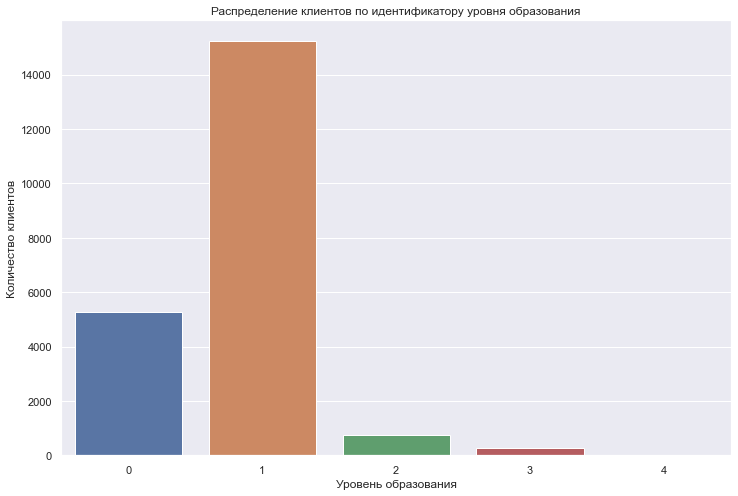

In [16]:
sns.countplot(data['education_id']).set(title='Распределение клиентов по идентификатору уровня образования',xlabel="Уровень образования", ylabel = "Количество клиентов");

Распределение клиентов по идентификатору уровня образования полностью повторяет распределение по уровню образования. Ошибок и аномалий - нет. Данный признак является излишним и подлежит удалению. 

### Анализ распределения исходных значений признаков  "Семейное положение" и "идентификатор семейного положения" (family_status, family_status_id)<a id="cc"></a> 

In [17]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

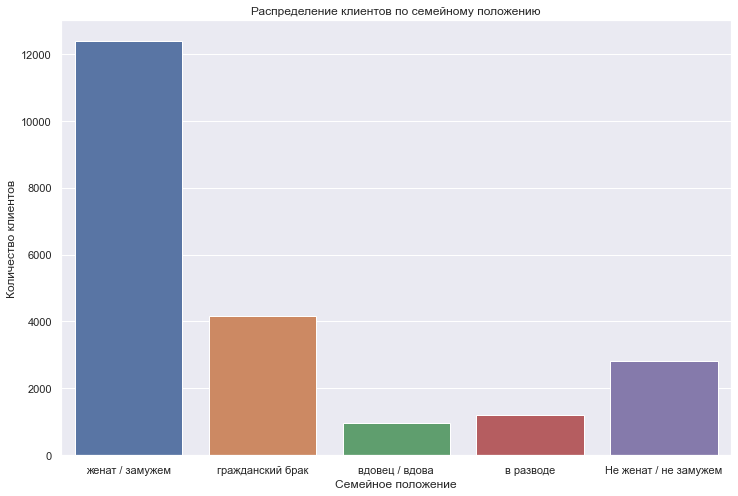

In [18]:
sns.countplot(data['family_status']).set(title='Распределение клиентов по семейному положению',xlabel="Семейное положение", ylabel = "Количество клиентов");

Почти 2/3 клиентов банка состоят в официальном или гражданском браке. Распределение выглядит вполне достоверно, так как обычно большинство кредитов обычно нацелено на улучшение условий жизни семьи (отдых, жилье, бытовая техника).

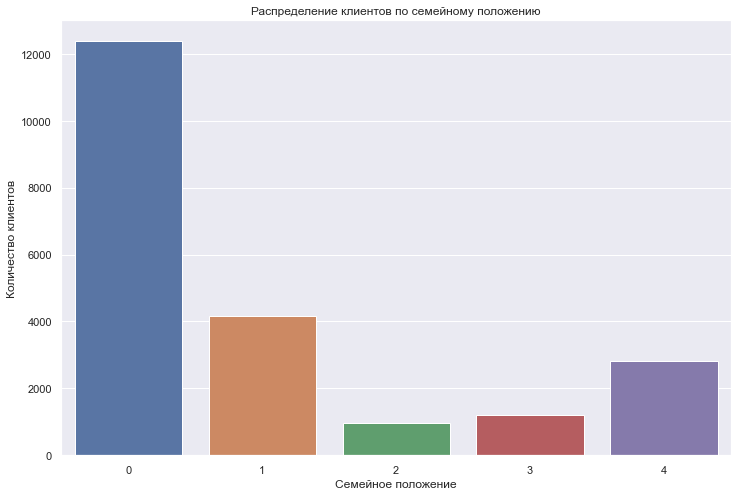

In [19]:
sns.countplot(data['family_status_id']).set(title='Распределение клиентов по семейному положению',xlabel="Семейное положение", ylabel = "Количество клиентов");

Распределение клиентов по идентификатору семейного положения полностью повторяет распределение по  семейному положению. Ошибок и аномалий - нет. Данный признак является излишним и подлежит удалению. 

### Анализ распределения исходных значений признака "Пол клиента (gender)"<a id="cd"></a> 

In [20]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [21]:
data[data.gender == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Удалим строку с пропущенным значением пола. Уменьшение размера датасета менее чем на 0,005% не повлияет на результаты анализа

In [22]:
data = data[data.gender != 'XNA']

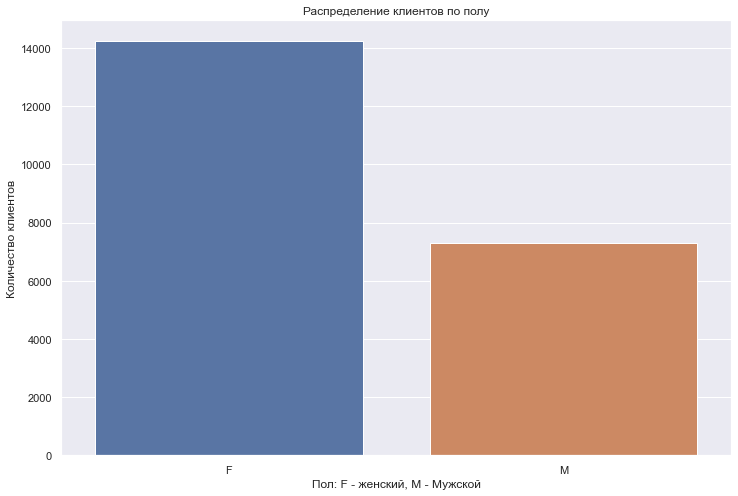

In [23]:
sns.countplot(data['gender']).set(title='Распределение клиентов по полу',xlabel="Пол: F - женский, M - Мужской", ylabel = "Количество клиентов");

Среди клиентов банка - 2/3 женщин. Баланс классов немного удивляет, но не является аномальным.  

### Анализ распределения исходных значений признака  "Тип занятости клиента (income_type)"<a id="ce"></a> 

In [24]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5084
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

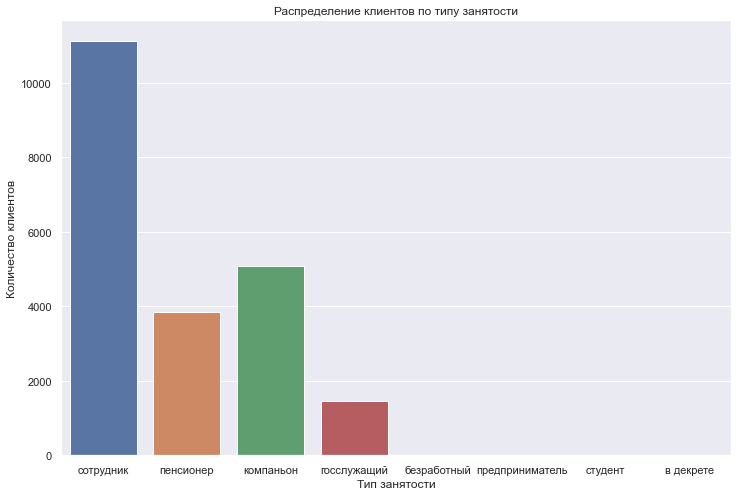

In [25]:
sns.countplot(data['income_type']).set(title='Распределение клиентов по типу занятости',xlabel="Тип занятости", ylabel = "Количество клиентов");

Среди кредитных клиентов банка преобладают сотрудники и почти отсутствуют безработные, предприниматели, студенты и лица, находящиеся в декретном отпуске. Всё выглядит вполне логично.

### Анализ распределения исходных значений признака  "Имел ли клиент задолженность по возврату кредитов (debt)"<a id="cf"></a>  

In [26]:
data['debt'].value_counts()

0    19783
1     1741
Name: debt, dtype: int64

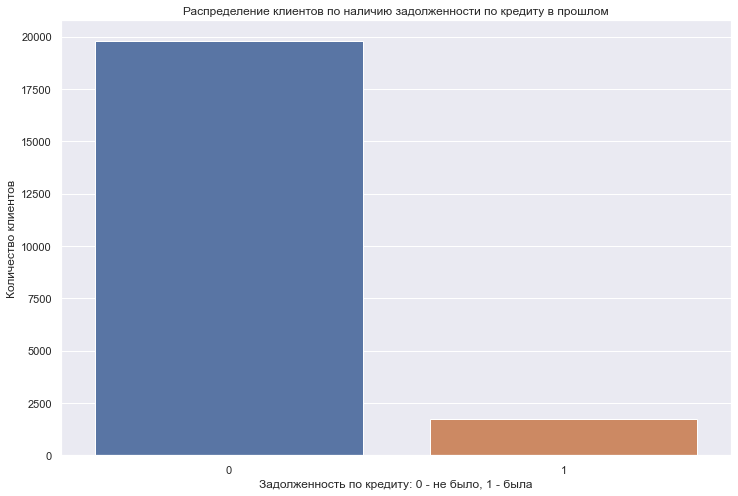

In [27]:
sns.countplot(data['debt']).set(title='Распределение клиентов по наличию задолженности по кредиту в прошлом',xlabel="Задолженность по кредиту: 0 - не было, 1 - была", ylabel = "Количество клиентов");

8,09 % клиентов банка имели задолженности по кредитам.
Это наш целевой признак и здесь налицо дисбаланс классов. Это необходимо учесть при построении модели прогнозирования невыплаты кредитов. 

### Анализ распределения исходных значений признака  "Возраст клиента в годах (dob_years)"<a id="cg"></a> 

In [28]:
data['dob_years'].value_counts().reset_index().sort_values(by='index', ascending =True)

,index,dob_years
47,0,101
54,19,14
52,20,51
46,21,111
44,22,183
41,23,254
40,24,263
35,25,357
33,26,408
21,27,493


Нулевое значение возраста у 101 клиента - явная ошибка ввода или обработки данных. Это примерно - 0,5% от всей выборки. Мы не можем восстановить точный возраст по другим признакам и вынуждены удалить все строки с таким значением

In [29]:
data = data[data.dob_years != 0]

In [30]:
data['dob_years'].describe()

count    21423.000000
mean        43.498390
std         12.246495
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

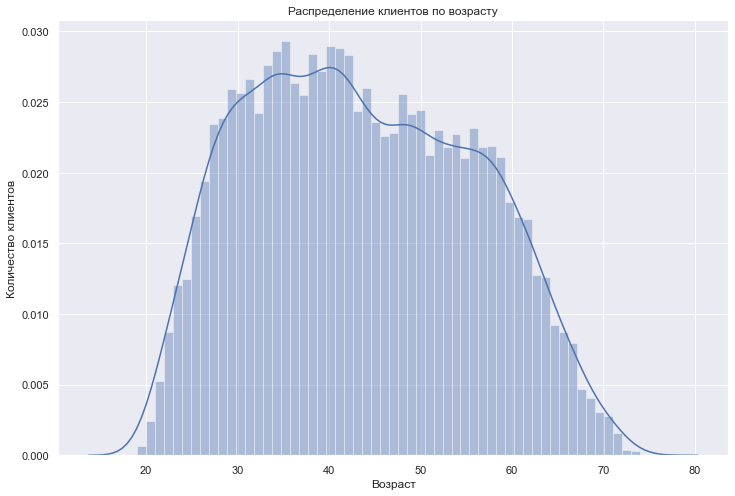

In [31]:
sns.distplot(data['dob_years'], bins = 57).set(title='Распределение клиентов по возрасту',xlabel="Возраст", ylabel = "Количество клиентов");

Теперь распределение кредитных клиентов банка по возрасту выглядит вполне достоверно и не указывает на наличие выбросов и аномалий

### Анализ распределения исходных значений признака  "Цель получения кредита (purpose)"<a id="ch"></a> 

In [32]:
print("Количество вариантов описания цели кредита:",len(data['purpose'].value_counts()))
print("Список вариантов описания цели кредита:")
print(data['purpose'].value_counts().index)

Количество вариантов описания цели кредита: 38
Список вариантов описания цели кредита:
Index(['свадьба', 'на проведение свадьбы', 'сыграть свадьбу',
       'операции с недвижимостью', 'покупка коммерческой недвижимости',
       'покупка жилья для сдачи', 'операции с коммерческой недвижимостью',
       'операции с жильем', 'жилье', 'покупка жилья',
       'покупка жилья для семьи', 'строительство собственной недвижимости',
       'недвижимость', 'операции со своей недвижимостью',
       'строительство жилой недвижимости', 'покупка недвижимости',
       'строительство недвижимости', 'покупка своего жилья', 'ремонт жилью',
       'покупка жилой недвижимости', 'на покупку своего автомобиля',
       'заняться высшим образованием', 'автомобиль',
       'сделка с подержанным автомобилем',
       'на покупку подержанного автомобиля', 'свой автомобиль', 'автомобили',
       'на покупку автомобиля', 'приобретение автомобиля',
       'дополнительное образование', 'сделка с автомобилем',
       'в

In [33]:
purpose_list = data['purpose'].value_counts().index 

Мы обнаружили 38 вариантов описания цели кредита, среди которых много смысловых дубликатов. Создадим специальный лист, куда  сложим все леммы, полученные из столбца "цель кредита", а затем подсчитаем, сколько раз упоминается каждое слово. 

In [34]:
m = Mystem() 

lemmas_list = []
for i in range(len(purpose_list)):
    lemmas_list += m.lemmatize(purpose_list[i])

print(Counter(lemmas_list))

Counter({' ': 59, '\n': 38, 'недвижимость': 10, 'покупка': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'на': 4, 'операция': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'высокий': 3, 'получение': 3, 'коммерческий': 2, 'для': 2, 'жилой': 2, 'заниматься': 2, 'сделка': 2, 'дополнительный': 2, 'проведение': 1, 'сыграть': 1, 'сдача': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'ремонт': 1, 'подержанный': 1, 'подержать': 1, 'приобретение': 1, 'профильный': 1})


Видим, что все формулировки цели кредита можно уложить в рамки четырех групп - недвижимость/жилье , автомобиль, образование, свадьба. Произведем соответствующие замены. 

In [35]:
data.loc[data['purpose'].str.contains(r'жиль(?!$)'), 'purpose'] = 'недвижимость'
data.loc[data['purpose'].str.contains(r'авто(?!$)'), 'purpose'] = 'автомобиль'
data.loc[data['purpose'].str.contains(r'образов(?!$)'), 'purpose'] = 'образование'
data.loc[data['purpose'].str.contains(r'недвиж(?!$)'), 'purpose'] = 'недвижимость'
data.loc[data['purpose'].str.contains(r'свадьб(?!$)'), 'purpose'] = 'свадьба'


In [36]:
data['purpose'].value_counts()

недвижимость    10792
автомобиль       4293
образование      4004
свадьба          2334
Name: purpose, dtype: int64

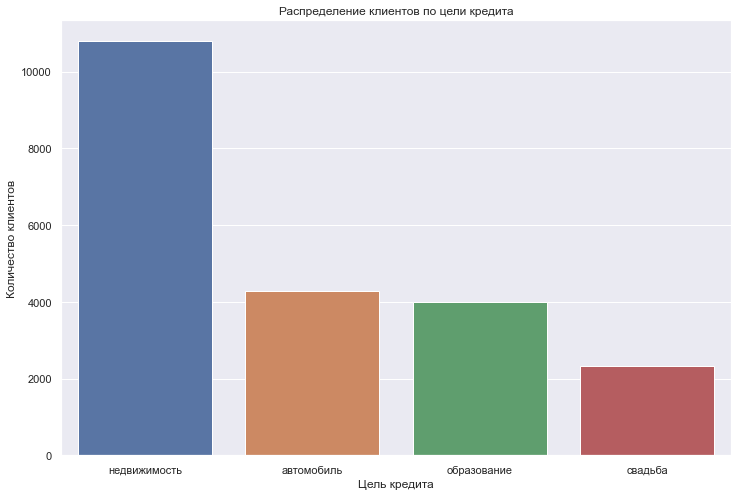

In [37]:
sns.countplot(data['purpose']).set(title='Распределение клиентов по цели кредита',xlabel="Цель кредита", ylabel = "Количество клиентов");

<font size="3"> Примерно половина всех кредитов берется для операций с недвижимостью. На втором и третьем месте по популярности - кредиты на покупку автомобиля и на получение образование. На последнем месте по популярности - кредиты на проведение свадьбы. Распределение выглядит вполне достоверным и не содержит в себе аномалий и выбросов. 

### Анализ распределения исходных значений признаков  "Общий трудовой стаж клиента в днях"  и "ежемесячный доход" (days_employed, total_income) <a id="ci"></a> 
Рассмотрим оба эти признака, так в них одинаковое количество пропущенных значений.            
Сначала проверим синхронны ли пропуски, для этого сначала заполним все пропуски нулями, предварительно убедившись в отсутствиии нулевых значений этих признаков в исходном датасете.

In [38]:
print("Количество нулевых значений в данных о трудовом стаже клиента:", len(data[data['days_employed'] == 0]),",в данных о ежемесячном доходе:", len(data[data['total_income'] == 0]))
print("Количество пропущенных значений в данных о трудовом стаже клиента:", pd.isnull(data['days_employed']).sum(), ",в данных о ежемесячном доходе:",pd.isnull(data['total_income']).sum())

Количество нулевых значений в данных о трудовом стаже клиента: 0 ,в данных о ежемесячном доходе: 0
Количество пропущенных значений в данных о трудовом стаже клиента: 2164 ,в данных о ежемесячном доходе: 2164


In [39]:
data.fillna({'days_employed': 0, 'total_income': 0}, inplace=True)
print("Количество строк с нулевым значением в обоих признаках:", len(data[(data['days_employed'] == 0) & (data['total_income'] == 0)]))

Количество строк с нулевым значением в обоих признаках: 2164


Таким образом установлено, что пропущенные значения в обоих признаках синхронны.           
Изменим тип данных обоих признаков с дробного на целочисленный.         
Запомним что нулевые значения заменяют пропуски и ознакомимся с распределением значений каждого из признаков.

In [40]:
data = data.astype({'days_employed': 'int64', 'total_income': 'int64'})

#### Ежемесячный доход клиента.<a id="cia"></a> 
Исключим из рассмотрения нулевые значения, которыми мы ранее заменили пропущенные значения

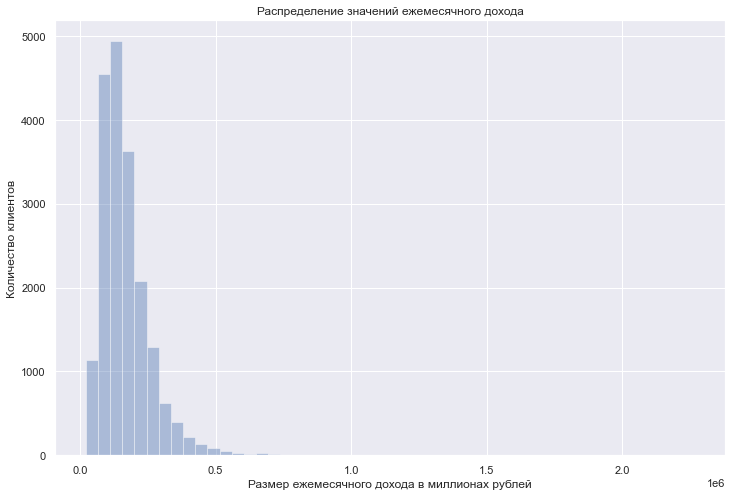

In [41]:
not_null_income_data = data[data.total_income >0]
sns.distplot(not_null_income_data['total_income'], kde=False).set(title='Распределение значений ежемесячного дохода',xlabel="Размер ежемесячного дохода в миллионах рублей", ylabel = "Количество клиентов"); 

Ознакомимся с со минимальными, максимальными и средними значениями ежемесячного дохода. Не будем использовать .describe( для большей наглядности выводимых значений 

In [42]:
print("Ежемесячный доход клиентов банка:")
print("Минимальное значение -",not_null_income_data['total_income'].min())
print("Максимальное значение -",not_null_income_data['total_income'].max())
print("Медианное значение - ",round(not_null_income_data['total_income'].median()))
print("Среднее значение- ", round(not_null_income_data['total_income'].mean()))


Ежемесячный доход клиентов банка:
Минимальное значение - 20667
Максимальное значение - 2265604
Медианное значение -  145005
Среднее значение-  167463


Попробуем разобраться в том, как устроен "длинный хвост" 

In [43]:
print("Количество клиентов с ежемесячным доходом, превышающим 500 000 рублей:", len(data[data.total_income >500000]))
print("Количество клиентов с ежемесячным доходом, превышающим 1 000 000 рублей:", len(data[data.total_income >1000000]))
print("Количество клиентов с ежемесячным доходом, превышающим 1 500 000 рублей:", len(data[data.total_income >1500000]))

Количество клиентов с ежемесячным доходом, превышающим 500 000 рублей: 222
Количество клиентов с ежемесячным доходом, превышающим 1 000 000 рублей: 25
Количество клиентов с ежемесячным доходом, превышающим 1 500 000 рублей: 7


Взглянем на этих людей, чтобы убедиться что их данные не противоречат наличию указанного ежемесячного дохода

In [44]:
data[data.total_income >1500000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9169,1,-5248,35,среднее,1,гражданский брак,1,M,сотрудник,0,1726276,образование
12412,0,-1477,44,высшее,0,женат / замужем,0,M,компаньон,0,2265604,недвижимость
17178,0,-5734,42,высшее,0,гражданский брак,1,M,компаньон,0,1711309,свадьба
17503,0,-2285,43,среднее,1,женат / замужем,0,M,компаньон,0,1597613,недвижимость
18368,1,-333,41,высшее,0,гражданский брак,1,M,компаньон,0,1551152,свадьба
19606,1,-2577,39,высшее,0,женат / замужем,0,M,компаньон,1,2200852,недвижимость
20809,0,-4719,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1715018,недвижимость


Распределение клиентов по ежемесячному доходу выглядит вполне реалистичным для крупного российского города. Данные клиентов с ежемесячным доходом свыше полутора милионов также вполне реалистичны. Отбросим всем клиентов с ежемесячным доходом выше 500 000 и еще раз посмотрим на распределение. 

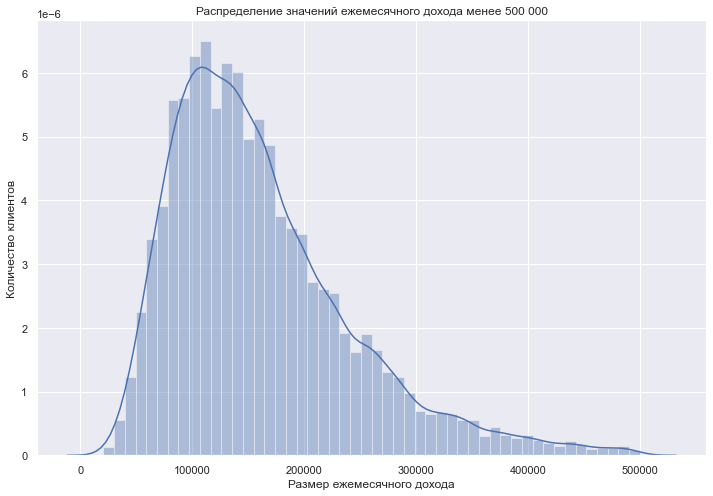

In [45]:
not_superhigh_income_data = data[(data.total_income < 500000) & (data.total_income > 0) ]
sns.distplot(not_superhigh_income_data['total_income']).set(title='Распределение значений ежемесячного дохода менее 500 000',xlabel="Размер ежемесячного дохода", ylabel = "Количество клиентов"); 


In [46]:
not_superhigh_income_data['total_income'].describe()

count     19037.000000
mean     161270.833692
std       80845.893053
min       20667.000000
25%      102623.000000
50%      144113.000000
75%      200906.000000
max      499924.000000
Name: total_income, dtype: float64

Распределение значений ежемесячного дохода выглядит вполне реалистично и в полном варианте (с длинным хвостом сверхсостоятельных клиентов) и в усеченной версии (доход до 500 000).

#### Общий трудовой стаж клиента в днях.<a id="cib"></a> 

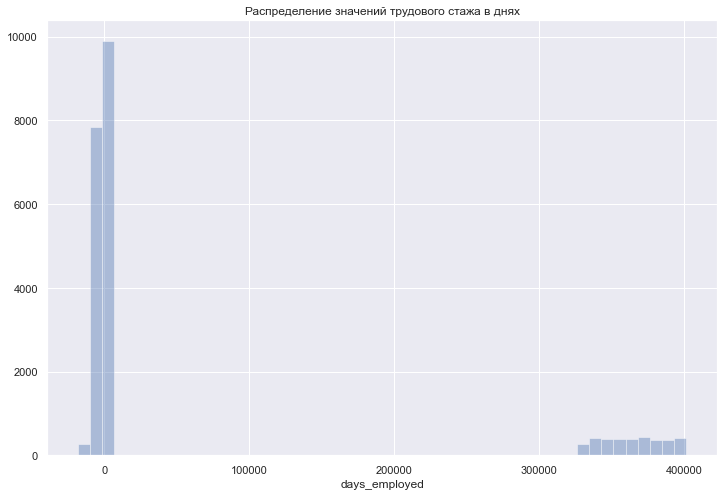

In [47]:

sns.distplot(data['days_employed'], kde=False).set(title='Распределение значений трудового стажа в днях');

Похоже, что значения показателя количества трудового стажа в днях распределены на две группы - отрицательный стаж и стаж от 300 до 400 тысяч дней, что выглядит крайне неправдоподобно. Введем новый, более интуитивно понятный показатель -  трудовой стаж клиента в годах, определим его минимальное и максимальное значения и разобъем значения на группы, визуально выделенные нами на графике. 

In [48]:
data['years_employed']= data['days_employed']/365
print("Минимальное количество лет трудового стажа:", round(data['years_employed'].min()), ".Максимальное количество лет трудового стажа:", round(data['years_employed'].max()))


Минимальное количество лет трудового стажа: -50 .Максимальное количество лет трудового стажа: 1101


In [49]:
data['years_empl_group'] = pd.cut(data['years_employed'], [-51, -20, -10, -5, -0.001, 0.001, 100,1111])
data['years_empl_group'].value_counts().reset_index().sort_values(by='index', ascending =True)

,index,years_empl_group
5,"(-51.0, -20.0]",754
3,"(-20.0, -10.0]",2382
1,"(-10.0, -5.0]",4103
0,"(-5.0, -0.001]",8592
4,"(-0.001, 0.001]",2164
6,"(0.001, 100.0]",0
2,"(100.0, 1111.0]",3428


2164 нулевых значений - это заполненные нами пропущенные значения.     
3428 клиентов со стажем более 100 лет - это явно ошибочные данные.         
И ни одного клиента с трудовым стажем от 0 до 100 лет, что очень странно!!!           
Даже если предположить что отрицательные значения стажа появились в результате ошибочного ввода знака "минус", мы всё равно получим значение стажа менее 5 лет для почти трети наших клиентов, что странно для выборки со средним возрастом 43 года.                  
Похоже нам ничего не остается, кроме как отказаться от использования данного признака

### Удаление ненужных столбцов.<a id="cj"></a>  

Удалим столбцы с указанием стажа в днях и в годах, группы по стажу, а также дублирующие столбцы статусов семейного положения и образования. 
Учтем в дальнейшем, что нулевые значения ежемесячного дохода заменяют пропущенные значения и не должны учитываться при анализе данного признака. Создадим для этого специальную версию датафрейма. 

In [50]:
data_new = data.drop(['education_id','family_status_id','days_employed','years_employed','years_empl_group'], axis=1).reset_index(drop=True)

## Исследовательский анализ данных.<a id="d"></a> 
Исследуем, какие признаки оказывают наибольшее влияние на факт наличия долга по кредиту. Создадим выборку с должниками и будем сравнивать распределение признаков среди всех клиентов и среди должников 

In [51]:
data_debt = data_new[data_new.debt == 1]

### Распределение классов/значений по каждому признаку для всех клиентов и для клиентов с долгом по кредиту.<a id="da"></a> 

Создадим функцию для отрисовки распределения значений заданного признака и вывода таблицы с долями по каждому из классов признака для всех клиентов и для должников и разницей между ними. 

In [52]:
ALL = len(data_new)
DEBT = len(data_debt)
def feature_compare(feature, title, Xtitle):
    temp_data =  pd.DataFrame(data_new[feature].value_counts()).reset_index()
    temp_data.columns = [feature,'all_share']
    temp_data['all_share'] = temp_data['all_share']/ALL
    temp_data_debt= pd.DataFrame(data_debt[feature].value_counts()).reset_index()
    temp_data_debt.columns = [feature,'debt']
    temp_data_debt['debt'] = temp_data_debt['debt']/DEBT
    temp_data['debt_share']=0.0
    for i in range(len(temp_data)):
        feature_value = temp_data[feature][i]
        try:
            some_value = temp_data_debt[temp_data_debt[feature] == feature_value].reset_index()
            temp_data['debt_share'][i] = some_value['debt'][0]
        except:    
            temp_data['debt_share'][i]= 0
    temp_data['debt_diff_all']= (temp_data['debt_share']-temp_data['all_share'])
    
    х = temp_data[feature]
    All = temp_data['all_share']
    Debt = temp_data['debt_share']
  
    X_axis = np.arange(len(х))
    plt.figure(figsize=(17,15))  
    plt.bar(X_axis - 0.2, All, 0.4, label = 'Все')
    plt.bar(X_axis + 0.2, Debt, 0.4, label = 'должники')
  
    plt.xticks(X_axis, х)
    plt.xlabel(Xtitle)
    plt.ylabel("Доля клиентов")
    plt.title(title)
    plt.legend()
    plt.show()
    return temp_data


#### Распределение по количеству детей среди всех клиентов и среди должников.<a id="daa"></a> 

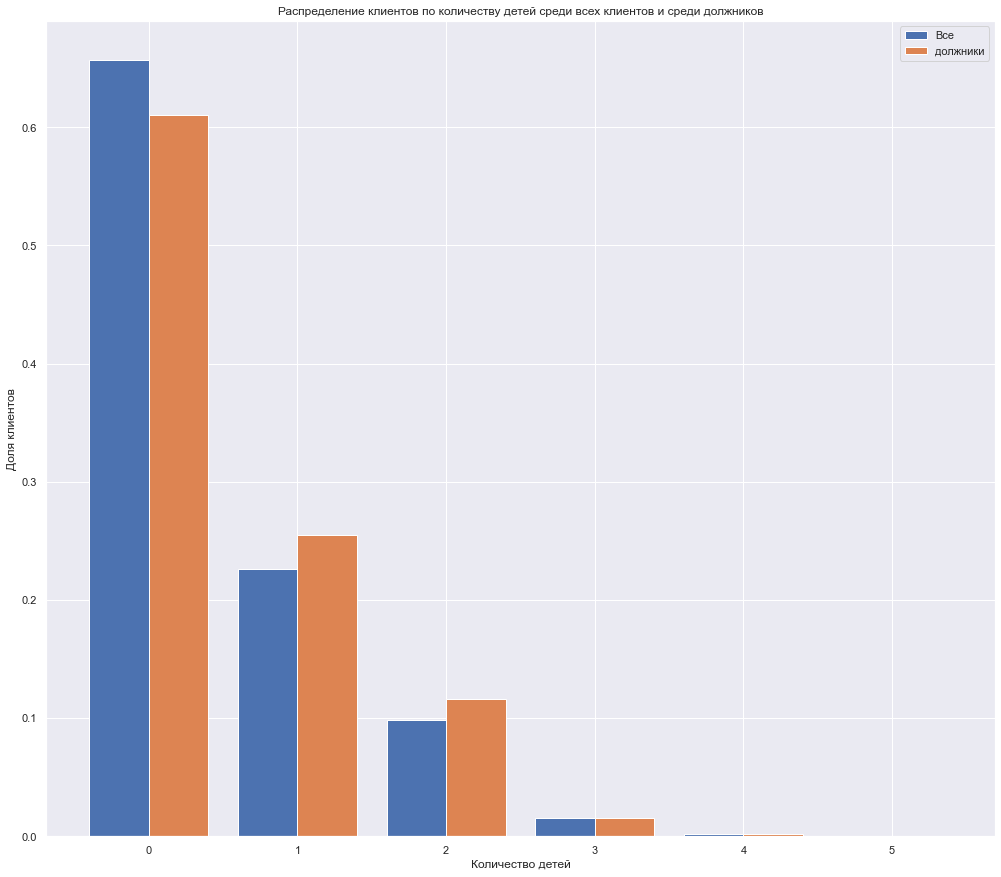

,children,all_share,debt_share,debt_diff_all
0,0,0.657191,0.610502,-0.046689
1,1,0.226346,0.255049,0.028704
2,2,0.098819,0.116561,0.017742
3,3,0.015311,0.015580,0.000269
4,4,0.001914,0.002308,0.000394
5,5,0.000420,0.000000,-0.000420


In [53]:
warnings.filterwarnings("ignore")
feature_compare('children', 'Распределение клиентов по количеству детей среди всех клиентов и среди должников' , 'Количество детей')

Доля бездетных клиентов среди должников на 5% меньше, а  клиентов с 1 и 2 детьми в семье - больше на 3% и 2% соответственно.


####  Распределение  по уровню образования среди всех клиентов и среди должников.<a id="dab"></a>  

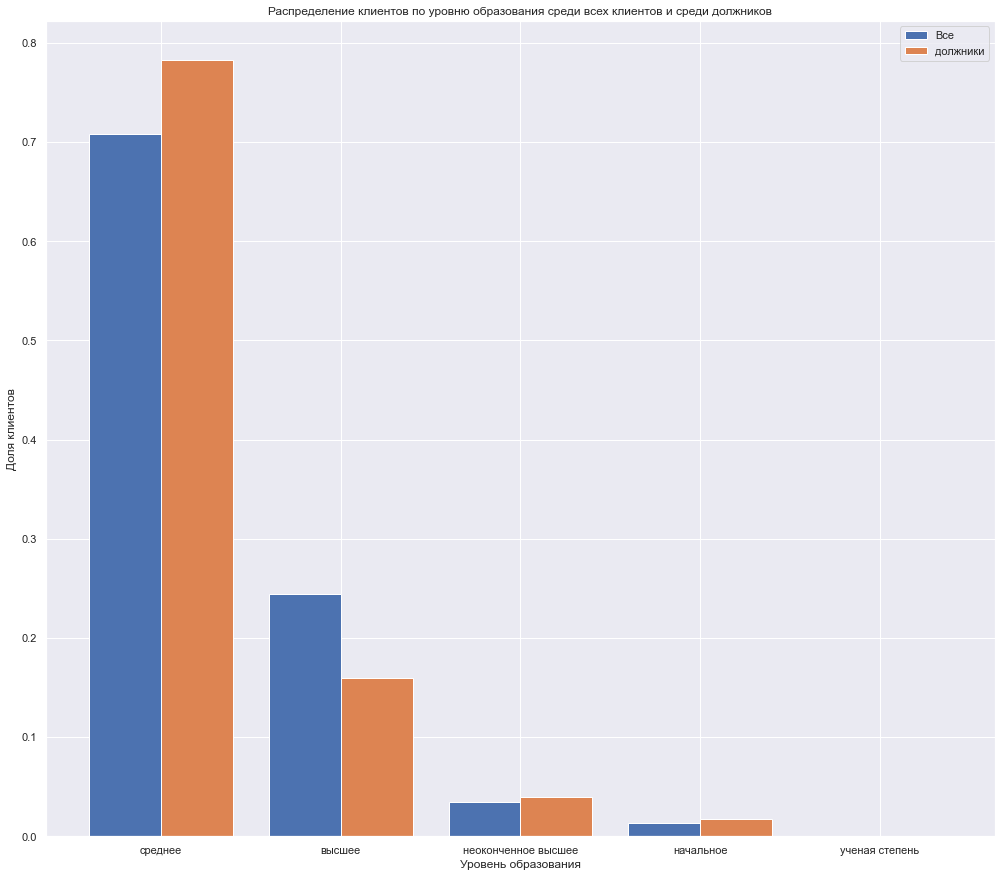

,education,all_share,debt_share,debt_diff_all
0,среднее,0.708071,0.783035,0.074964
1,высшее,0.243897,0.159838,-0.084058
2,неоконченное высшее,0.034589,0.039238,0.004649
3,начальное,0.013163,0.017888,0.004725
4,ученая степень,0.000280,0.000000,-0.000280


In [54]:
warnings.filterwarnings("ignore")
feature_compare('education', 'Распределение клиентов по уровню образования среди всех клиентов и среди должников' , 'Уровень образования')

Среди должников - на 7,5% больше лиц со средним образованием и на 8,5% меньше тех клиентов, кто имеет высшее образование. Среди должников также больше тех, у кого незаконченное высшее или начальное образование, однако доля таких клиентов невелика и подобное наблюдение недостаточно статистически обосновано. 

####  Распределение  по семейному статусу среди всех клиентов и среди должников.<a id="dac"></a> 

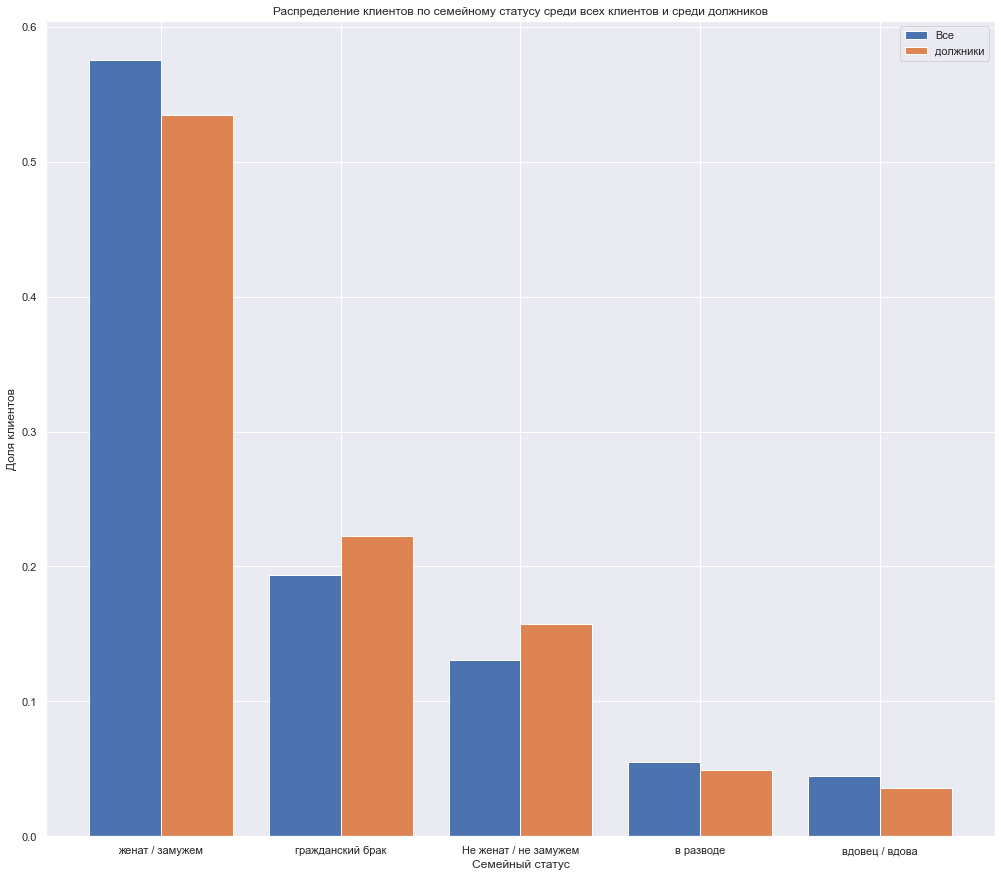

,family_status,all_share,debt_share,debt_diff_all
0,женат / замужем,0.575596,0.534911,-0.040686
1,гражданский брак,0.193950,0.222735,0.028785
2,Не женат / не замужем,0.130561,0.157530,0.026970
3,в разводе,0.055314,0.049048,-0.006266
4,вдовец / вдова,0.044578,0.035776,-0.008802


In [55]:
warnings.filterwarnings("ignore")
feature_compare('family_status', 'Распределение клиентов по семейному статусу среди всех клиентов и среди должников' , 'Семейный статус')

Меньше всего должников среди женатых/замужних - на 4%. Доля должников среди состоящих в гражданском браке и неженатых/незамужних выше на 2,9% и на 2,7% соответственно. 

####  Распределение  по полу среди всех клиентов и среди должников.<a id="dad"></a> 

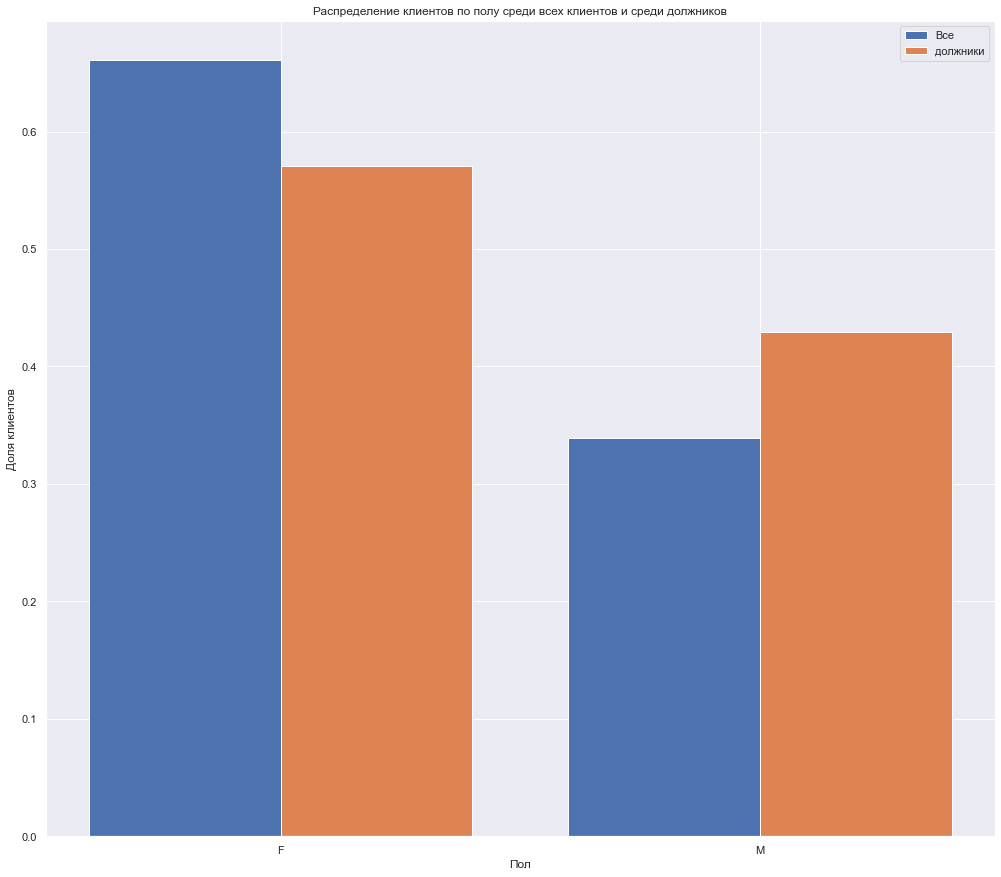

,gender,all_share,debt_share,debt_diff_all
0,F,0.661159,0.570687,-0.090472
1,M,0.338841,0.429313,0.090472


In [56]:
warnings.filterwarnings("ignore")
feature_compare('gender', 'Распределение клиентов по полу среди всех клиентов и среди должников' , 'Пол')

Среди должников -  доля мужчин на 9% больше, чем среди всех клиентов банка

####  Распределение  по типу занятости среди всех клиентов и среди должников.<a id="dae"></a> 

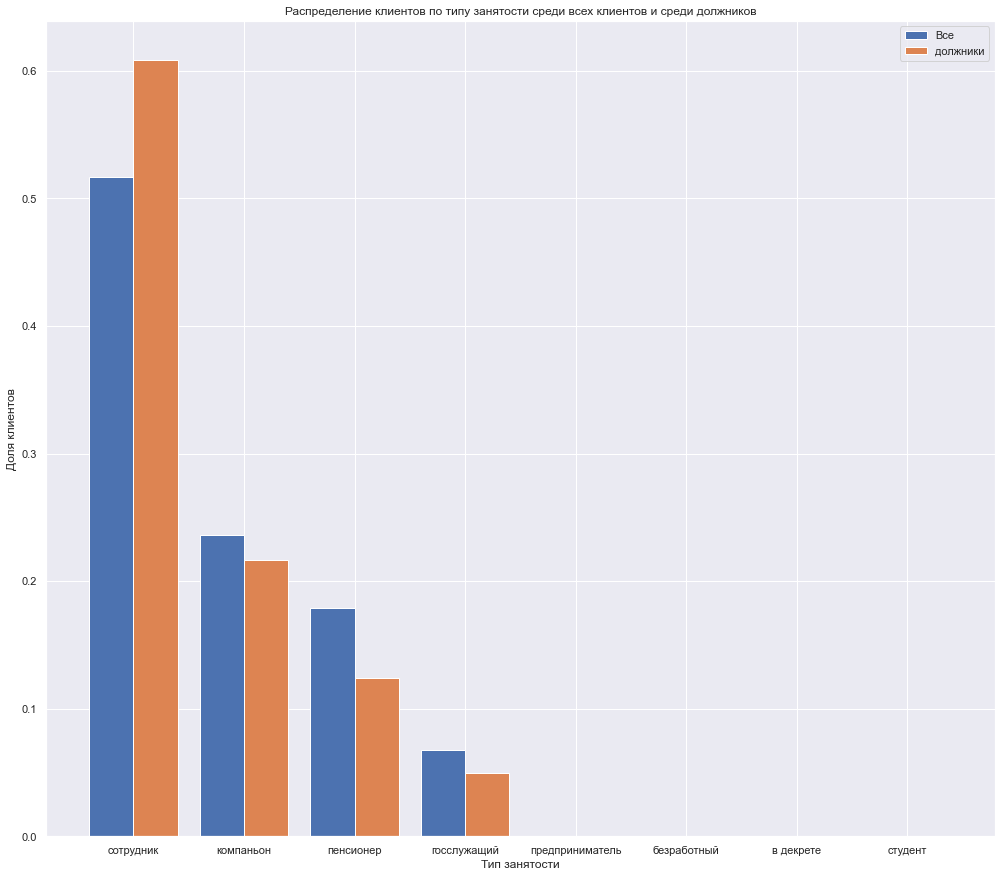

,income_type,all_share,debt_share,debt_diff_all
0,сотрудник,0.516454,0.608771,0.092317
1,компаньон,0.236381,0.216388,-0.019994
2,пенсионер,0.179060,0.124062,-0.054998
3,госслужащий,0.067824,0.049625,-0.018199
4,предприниматель,0.000093,0.000000,-0.000093
5,безработный,0.000093,0.000577,0.000484
6,в декрете,0.000047,0.000577,0.000530
7,студент,0.000047,0.000000,-0.000047


In [57]:
warnings.filterwarnings("ignore")
feature_compare('income_type', 'Распределение клиентов по типу занятости среди всех клиентов и среди должников' , 'Тип занятости')

Среди должников доля клиентов с формой занятости "сотрудник" выше на 9%. Среди компаньонов, пенсионеров и госслужащих - меньше на 2%, 5,5% и 1,8% соответственно. В других категориях результаты сравнения статистически незначимы. 

####  Распределение клиентов по цели кредита среди всех клиентов и среди должников.<a id="dai"></a> 

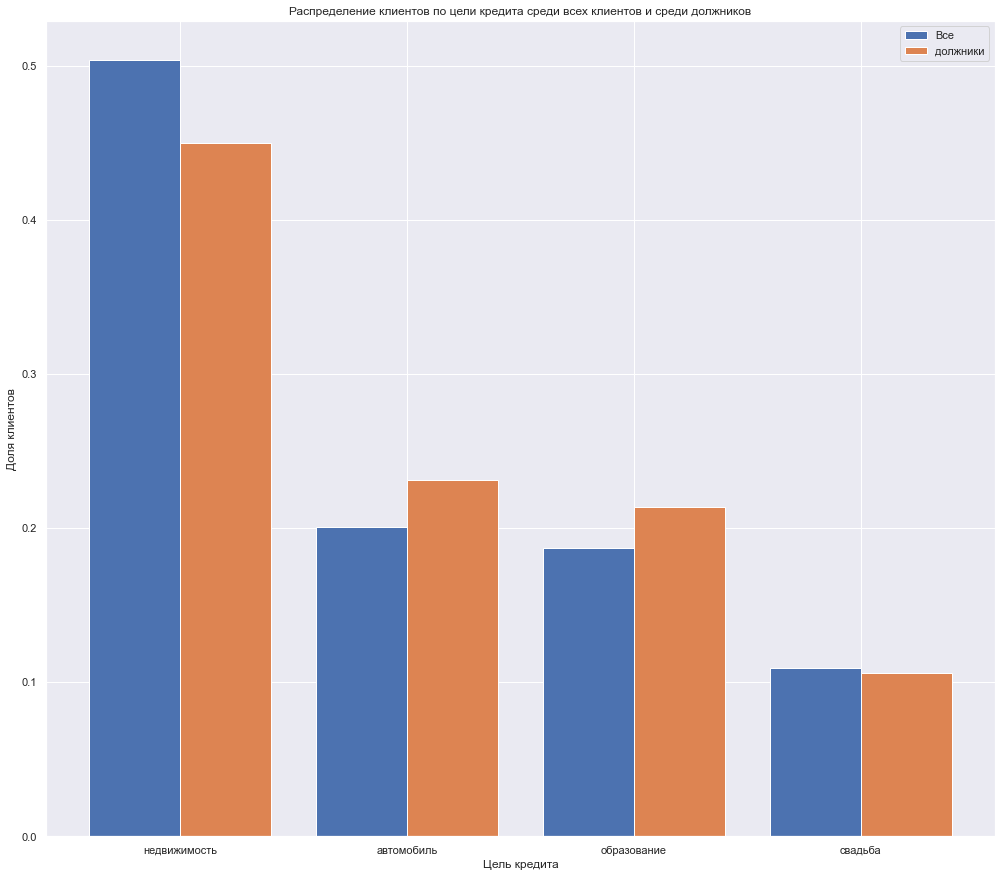

,purpose,all_share,debt_share,debt_diff_all
0,недвижимость,0.503758,0.449510,-0.054248
1,автомобиль,0.200392,0.230814,0.030422
2,образование,0.186902,0.213503,0.026601
3,свадьба,0.108948,0.106174,-0.002774


In [58]:
warnings.filterwarnings("ignore")
feature_compare('purpose', 'Распределение клиентов по цели кредита среди всех клиентов и среди должников' , 'Цель кредита')

Доля клиентов, взявших кредит на операции с недвижимостью среди должников на 5% меньше чем среди всех клиентов, а доля взявших кредит на покупку автомобиля или образование - больше на 3% и 2,7% соответственно.

#### Распределение  по возрасту среди всех клиентов и среди должников.<a id="daf"></a> 

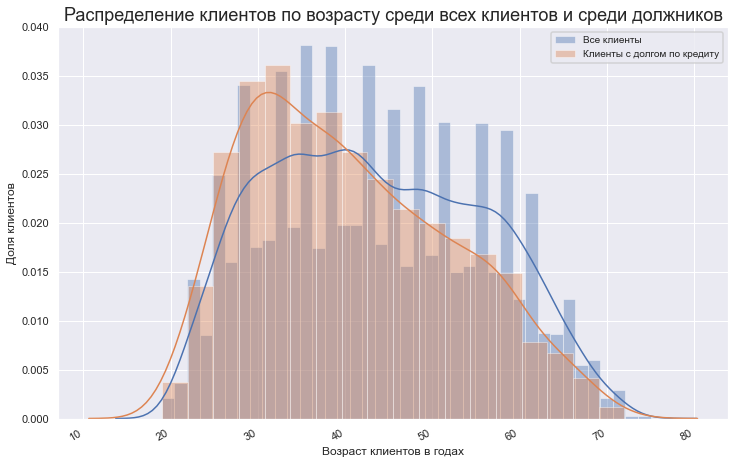

In [59]:
f, ax = plt.subplots(1, 1)
 
sns.distplot(data_new['dob_years'], label='Все клиенты')
sns.distplot(data_debt['dob_years'], label='Клиенты с долгом по кредиту');
sns.set_context("talk", rc={'legend.fontsize': 10.0})
ax.legend()
plt.gcf().autofmt_xdate()
plt.xlabel("Возраст клиентов в годах")
plt.ylabel("Доля клиентов")
plt.title("Распределение клиентов по возрасту среди всех клиентов и среди должников")
plt.show()

Среди должников больше доля клиентов с возрастом менее 40 лет. Наиболее высока она среди  тех, кому 27-35 лет. Среди клиентов старше 50 лет доля должников заметно меньше, чем среди всех клиентов.
Разобъем клиентов на группы по возрастам, чтобы увидеть распределение наглядней. 

In [60]:
bin_labels_age = ['18-25', '25-35', '35-45', '45-55', '55-65', '>65']

data_new['age_goup'] = pd.cut(data_new['dob_years'], [18, 25, 35, 45, 55, 65,78], labels=bin_labels_age)
data_debt['age_goup'] = pd.cut(data_debt['dob_years'], [18, 25, 35, 45, 55, 65,78], labels=bin_labels_age)


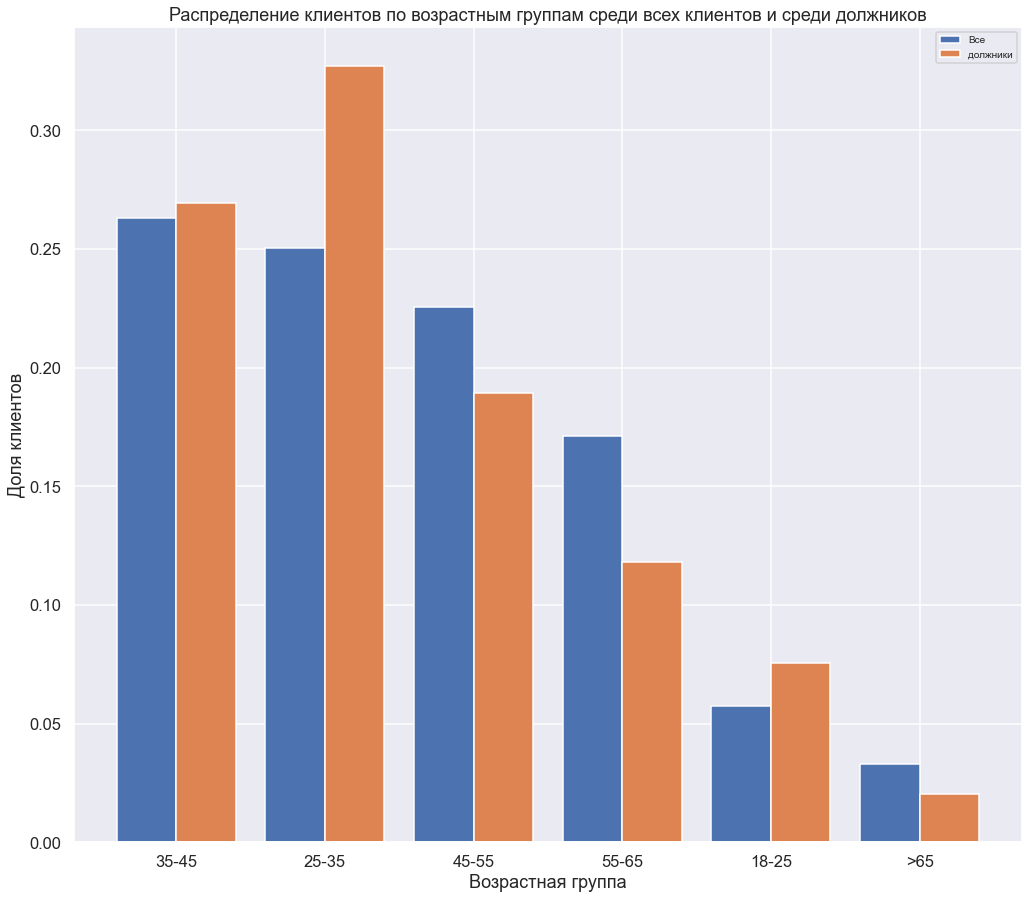

,age_goup,all_share,debt_share,debt_diff_all
0,35-45,0.262942,0.269475,0.006533
1,25-35,0.250198,0.327178,0.076980
2,45-55,0.225365,0.189267,-0.036098
3,55-65,0.171031,0.118292,-0.052739
4,18-25,0.057555,0.075591,0.018036
5,>65,0.032909,0.020196,-0.012712


In [61]:
warnings.filterwarnings("ignore")
feature_compare('age_goup', 'Распределение клиентов по возрастным группам среди всех клиентов и среди должников' , 'Возрастная группа')
 

Среди должников доля клиентов в возрасте 25-35 выше на 7,7%, а доля клиентов в возрасте 45-55 и 55-65 - меньше на 3,6% и 5% соответственно

####  Распределение по ежемесячному доходу среди всех клиентов и среди должников.<a id="dag"></a> 
Для сравнения распределений по ежемесячному доходу сделаем подвыборку из нашего датафрейма data_new, убрав из него нулевые значения(заменяющие пропущенные) и значения выше 500 000, так как число таких клиентов слишком мало для статистически значимых выводов.

In [62]:

data_new_cleared_income = data_new[(data_new.total_income < 500000) & (data_new.total_income > 0) ]
data_debt_cleared_income = data_new_cleared_income[data_new_cleared_income.debt == 1]

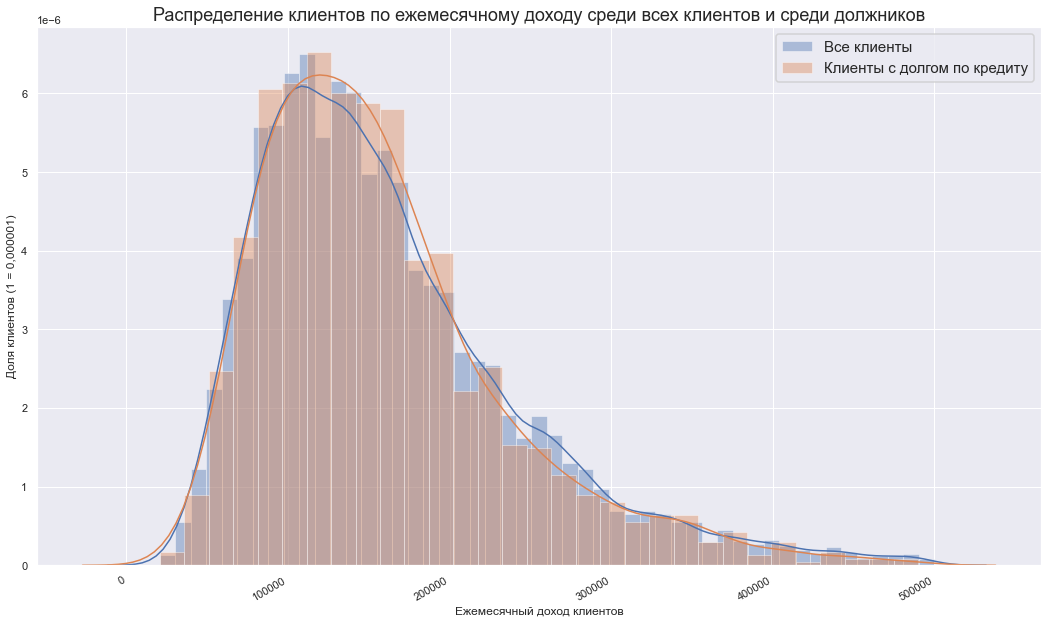

In [63]:
sns.set(rc={"figure.figsize":(18, 11)})
f, ax = plt.subplots(1, 1)
 
plot_ = sns.distplot(data_new_cleared_income['total_income'], label='Все клиенты')
sns.distplot(data_debt_cleared_income['total_income'], label='Клиенты с долгом по кредиту');
sns.set_context("talk", rc={'legend.fontsize': 15.0})

ax.legend()
plt.gcf().autofmt_xdate()
plt.xlabel("Ежемесячный доход клиентов")
plt.ylabel("Доля клиентов (1 = 0,000001)")
plt.title("Распределение клиентов по ежемесячному доходу среди всех клиентов и среди должников")
plt.show()

Как это ни удивительно, доля клиентов с ежемесячным доходом от 100 000 до 200 000 среди должников несколько выше чем среди всех клиентов.       
Разобъем клиентов на группы по доходу, чтобы увидеть распределение наглядней. 

In [64]:
bin_labels_income = ['20-70 тыс', '70-120 тыс', '120-170 тыс', '170-220 тыс', '220-270 тыс', '270-400тыс', '>400тыс']

data_new['income_goup'] = pd.cut(data_new['total_income'], [20000, 70000, 120000, 170000, 220000, 270000, 400000, 22700000], labels=bin_labels_income)
data_debt['income_goup'] = pd.cut(data_debt['total_income'], [20000, 70000, 120000, 170000, 220000, 270000,400000,22700000], labels=bin_labels_income)

In [65]:
data_new['income_goup'].value_counts()

70-120 тыс     5339
120-170 тыс    5271
170-220 тыс    3193
220-270 тыс    1854
270-400тыс     1605
20-70 тыс      1469
>400тыс         528
Name: income_goup, dtype: int64

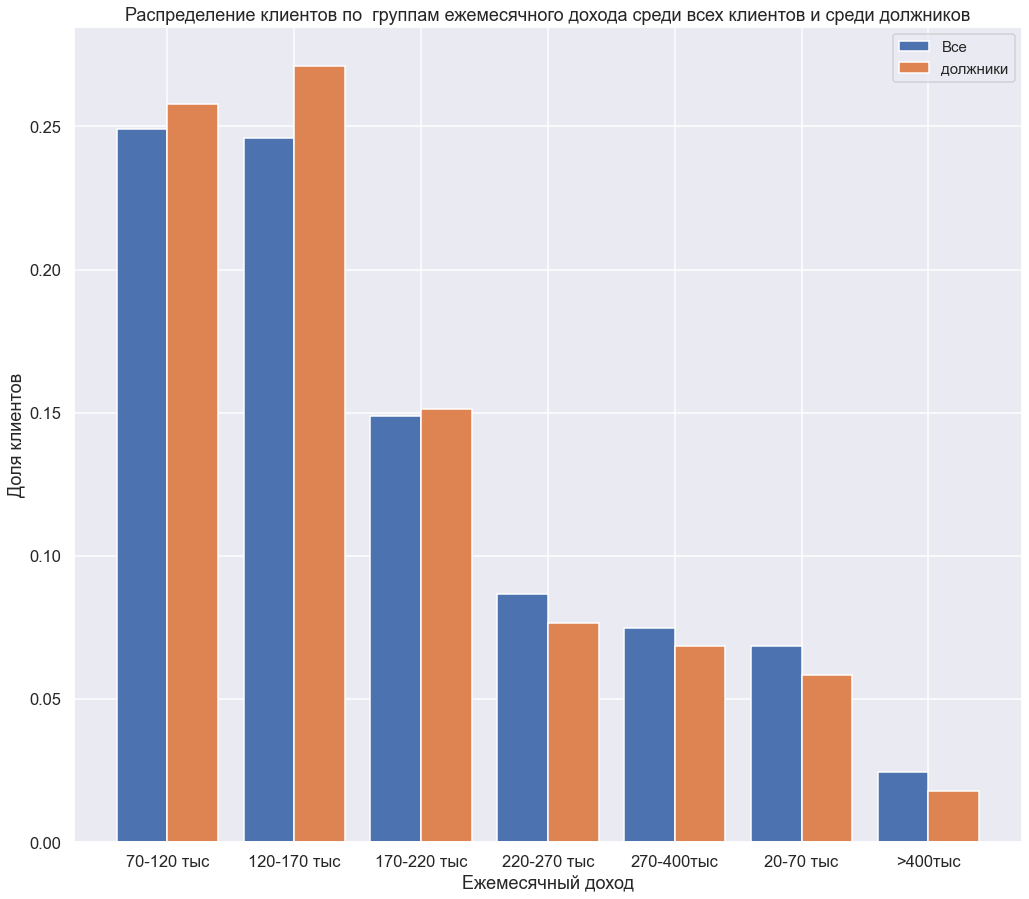

,income_goup,all_share,debt_share,debt_diff_all
0,70-120 тыс,0.249218,0.257934,0.008716
1,120-170 тыс,0.246044,0.271206,0.025162
2,170-220 тыс,0.149045,0.151183,0.002138
3,220-270 тыс,0.086543,0.076746,-0.009797
4,270-400тыс,0.074919,0.068667,-0.006252
5,20-70 тыс,0.068571,0.058280,-0.010291
6,>400тыс,0.024646,0.017888,-0.006758


In [66]:
warnings.filterwarnings("ignore")
feature_compare('income_goup', 'Распределение клиентов по  группам ежемесячного дохода среди всех клиентов и среди должников' , 'Ежемесячный доход')

Среди должников  доля клиентов с ежемесячным доходом от 70 до 120 000 выше на 0,9%, от 120 до 170 000 выше на 2,5%, и  ниже доля клиентов с доходом до 70 000 рублей и доходом выше 220 000 рублей. 

## Проверка мультиколлинеарности признаков и определение важности признаков по влиянию на факт невыплаты кредита.<a id="db"></a>  
Используем модель классификации случайного леса для того, чтоб установить влияние каждого признака на факт невыплаты кредита. Так как в признаке ежемесячного дохода вместо пропущенных значений мы использовали нулевые значения, здесь мы будем использовать датасет без нулевых значений ежемесячного дохода.
Так как в целевом признаке наблюдается дисбаланс классов, учтем этот факт при настройке параметров модели. 

In [67]:

data_new_cleared_income = data_new[(data_new.total_income > 0) ]
data_new_cleared_income = data_new_cleared_income.drop(['dob_years','total_income'], axis=1).reset_index(drop=True)  
data_debt_cleared_income = data_new_cleared_income[data_new_cleared_income.debt == 1]

In [68]:
X_train = data_new_cleared_income.drop('debt', axis=1)  
y_train = data_new_cleared_income['debt']

In [69]:
print("Баланс классов в целевом признаке:")
print("Доля должников (значение 1) - {:.2}".format(y_train.sum()/len(y_train)))

Баланс классов в целевом признаке:
Доля должников (значение 1) - 0.081


Переведем категориальные признаки в численные. 

In [70]:
encoder = OrdinalEncoder() 
X_train = pd.DataFrame(encoder.fit_transform(X_train), columns=X_train.columns)

Проверим признаки на мультиколлинеарность

In [71]:
X_train.corr()

,children,education,family_status,gender,income_type,purpose,age_goup,income_goup
children,1.000000,-0.031685,0.159961,0.043752,0.062547,-0.002384,-0.306293,-0.001259
education,-0.031685,1.000000,0.027578,0.011226,0.122922,-0.000561,0.126241,-0.008253
family_status,0.159961,0.027578,1.000000,0.037352,0.004595,-0.002425,0.067941,0.002524
gender,0.043752,0.011226,0.037352,1.000000,0.075994,-0.008450,-0.129350,-0.037561
income_type,0.062547,0.122922,0.004595,0.075994,1.000000,0.012432,-0.129652,-0.015541
purpose,-0.002384,-0.000561,-0.002425,-0.008450,0.012432,1.000000,-0.005061,0.007963
age_goup,-0.306293,0.126241,0.067941,-0.129350,-0.129652,-0.005061,1.000000,0.023844
income_goup,-0.001259,-0.008253,0.002524,-0.037561,-0.015541,0.007963,0.023844,1.000000


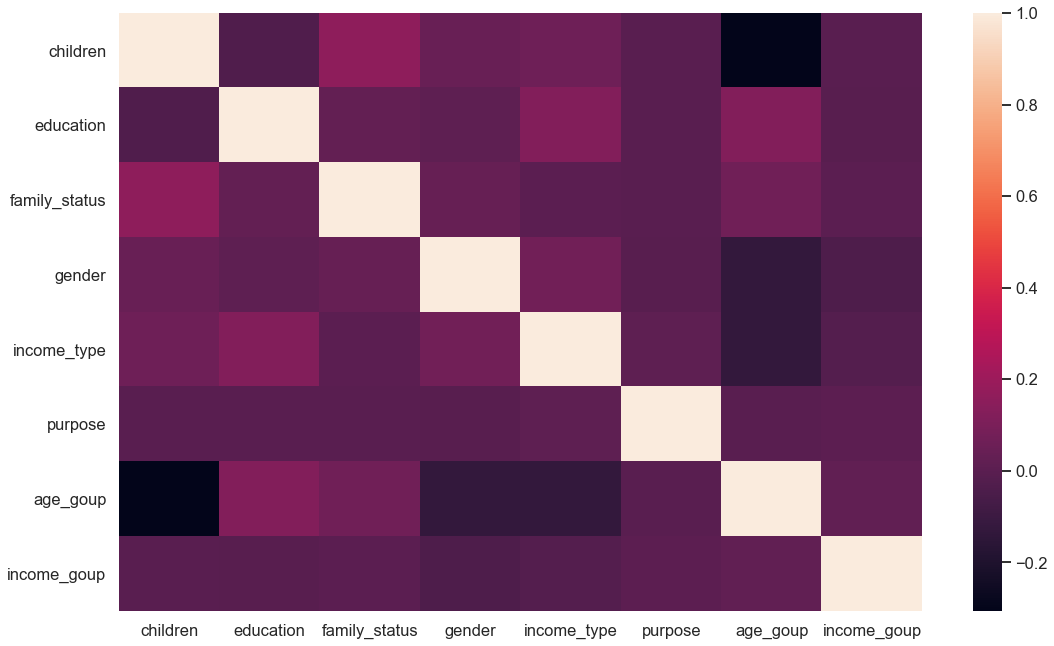

In [72]:
sns.heatmap(X_train.corr());

Корреляция между признаками очень слабая. 
Самые большие значение: 
- 0,16 - корреляция между семейным статусом и количеством детей 
- -0,3 - отрицательная корреляция между возрастом и количеством детей.  
- 0,12 - корреляция между уровнем образования  и типом занятости
- 0,12 - корреляция между уровнем образования  и возрастом
- - 0,13 - отрицательная корреляция между возрастом и полом 
- - 0,13 - отрицательная корреляция между возрастом и типом занятости 

Для оценки важности признаков с точки зрения влияния на факт невозврата кредита используем модель классификатора случайного леса. Нормализацию (стандартизацию) признаков в при использовании алгоритма случайного леса можно не проводить   

 1) income_goup                    0.271236
 2) age_goup                       0.148934
 3) family_status                  0.134265
 4) purpose                        0.127860
 5) children                       0.110009
 6) income_type                    0.100347
 7) education                      0.077805
 8) gender                         0.029544


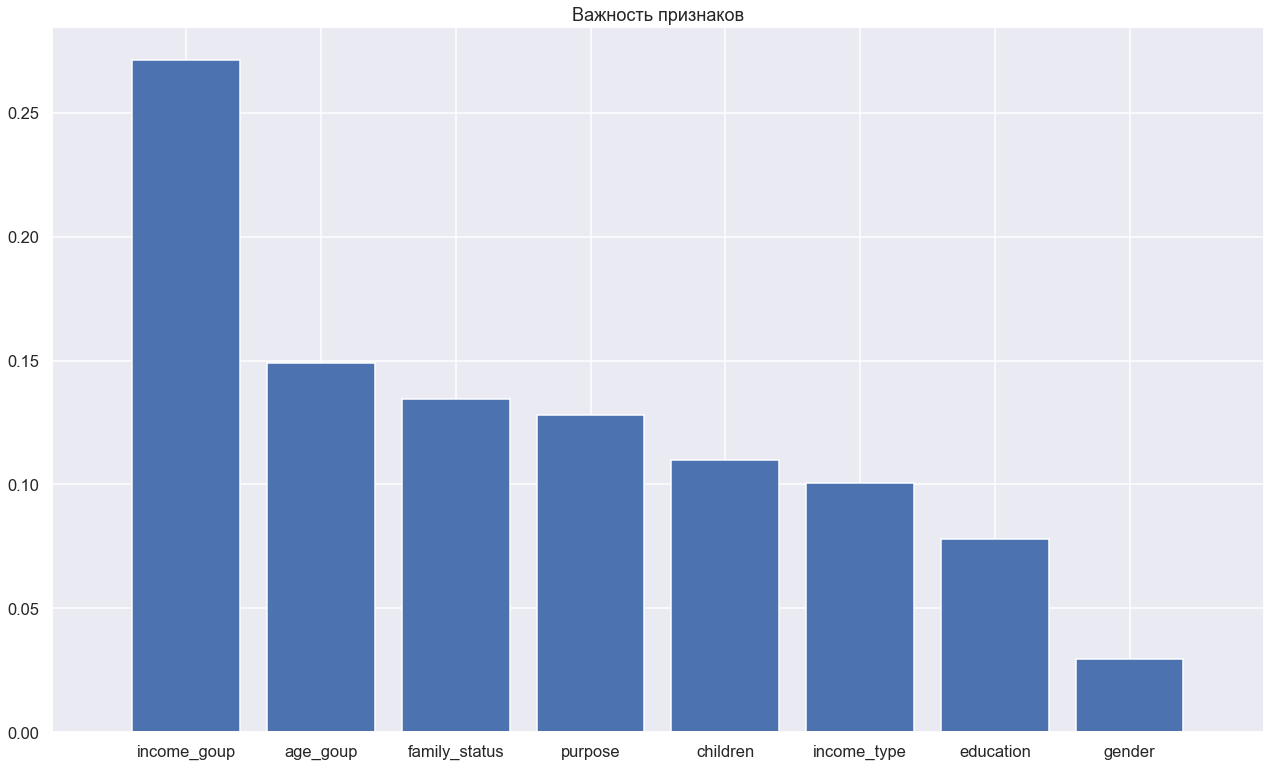

In [73]:
feat_labels = X_train.columns
forest = RandomForestClassifier(n_estimators=500,random_state=1, class_weight={0:.92, 1:.08})
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],importances[indices[f]])) 
plt.title('Важность признаков' )
plt.bar(range(X_train.shape[1]), importances[indices],align='center' )
plt.xticks(range(X_train.shape[1]), feat_labels[indices])
plt.xlim([-1, X_train.shape[1]]) 
plt.tight_layout()
plt.show()

Важность признаков в процентах по убыванию:
- уровень ежемесячного дохода - 27%
- возрастная группа - 15%
- семейный статус - 13%
- цель кредита - 13% 
- количество детей - 11%
- тип занятости - 10%
- образование - 8%
- пол - 3%

Таким образом, самый важный признаки с точки зрения обремененности клиента невозвращенным кредитом - его уровень ежемесячного дохода.
Менее важны возраст, семейный статус, цель кредита, количество детей и тип занятости. А вот пол клиента - практически не влияет на наличие у него невозвращенного кредита

## Выводы.<a id="e"></a> 

Наиболее "опасны" с точки зрения невозврата кредита (по сравнению со всей выборкой) клиенты, отвечающие одному или нескольким из следующих условий: 
- ежемесячный доход от 120 до 170 00;
- возраст 25-35 лет;
- неженат/не замужем или состоит в гражданском браке;
- цель кредита - покупка автомобиля или образование;
- нет детей;
- тип занятости - "сотрудник" 
- имеет среднее, начальное или незаконченное высшее образование; 
- пол - мужской

Наименее "опасны" с точки зрения невозврата кредита (по сравнению со всей выборкой) клиенты, отвечающие одному или нескольким из следующих условий:: 
- ежемесячный доход до 70 000  или  220 000; 
- возраст 45-65 лет;
- женат/замужем; 
- цель кредита - операции с недвижимостью;
- есть 1 или 2 ребенка;
- тип занятости - "компаньон", "пенсионер" или "госслужащий"; 
- имеет высшее образование; 
- пол - женский. 
